In [2]:
import json
import requests
import pandas as pd
%matplotlib inline

response = requests.get("https://api.cryptonator.com/api/full/eth-usd")
json_data = json.loads(response.text)

base = json_data["ticker"]["base"]
target = json_data["ticker"]["target"]
markets = json_data["ticker"]["markets"]

markets_df = pd.DataFrame(markets)
markets_df

,market,price,volume
0,BitFinex,865.12000000,46095.160981
1,Bittrex,866.99999999,1505.153346
2,C-Cex,872.00000000,0.777140
3,Cex.io,880.00000000,1342.770708
4,Exmo,869.53680000,3523.338842
5,Hitbtc,873.15000000,4324.411000
6,Kraken,864.08000000,12833.495728
7,Livecoin,858.09335000,790.561944
8,Poloniex,865.90760000,2275.424176
9,wexnz,854.00000000,4932.994170


In [3]:
print(base+"/"+target+" pairing:\n")

max_index = markets_df["price"].argmax()
max_market = markets_df.iloc[max_index]

print("Market {0} has the maximum price of ${1} and has volume {2}".format(max_market.market, max_market.price, max_market.volume))

min_index = markets_df["price"].argmin()
min_market = markets_df.iloc[min_index]

print("Market {0} has the minimum price of {1} and has volume {2}".format(min_market.market, min_market.price, min_market.volume))
difference = float(max_market.price)-float(min_market.price)
print("\nWe can prfit ${0} from the difference in prices".format(str(difference)))

ETH/USD pairing:

Market Cex.io has the maximum price of $880.00000000 and has volume 1342.770708
Market wexnz has the minimum price of 854.00000000 and has volume 4932.99417

We can prfit $26.0 from the difference in prices


Visualization


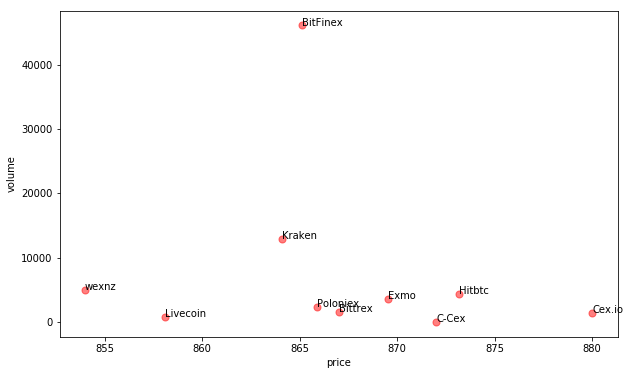

In [4]:
markets_df[["price","volume"]] = markets_df[["price","volume"]].apply(pd.to_numeric) 
ax = markets_df.plot.scatter(x='price',y='volume',color="red",s=50,figsize=(10, 6),alpha=0.5)
markets_df[['price','volume','market']].apply(lambda x: ax.text(*x),axis=1)
print("Visualization")